# Exercise 5: Implement the PCA Class
5.2) Test the PCA class in a jupyter notebook using the iris.csv dataset (classificação).

In [1]:
from si.io.csv_file import read_csv
from si.data.dataset import Dataset

# Load Iris dataset
iris = read_csv("../datasets/iris/iris.csv",features=True, label=True)

print("Dataset has label?",iris.has_label())
print("Label:", iris.label)
print("Label classes:",iris.get_classes())
print("Features:", iris.features)
print("Shape of dataset:", iris.shape())

Dataset has label? True
Label: class
Label classes: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
Features: Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')
Shape of dataset: (150, 4)


In [2]:
X = iris.X
y = iris.y
features = iris.features
label = iris.label

iris = Dataset(X=X, y=y, features=features, label=label)

### Implementing PCA

In [3]:
from si.decomposition.pca import PCA

# PCA with 2 components
pca = PCA(n_components=2)

# Fit the PCA model
pca.fit(iris)

In [4]:
# Transform the dataset
iris_reduced = pca.transform(iris)

# Display the results
print("Principal Components (Eigenvectors):")
print(pca.components)

print("\nExplained Variance (Proportion):")
print(pca.explained_variance)

print("\nReduced Dataset (first 5 samples):")
print(iris_reduced.X[:5])

print("\nFeature Names of the Reduced Dataset:")
print(iris_reduced.features)

Principal Components (Eigenvectors):
[[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [-0.65653988 -0.72971237  0.1757674   0.07470647]]

Explained Variance (Proportion):
[0.92461621 0.05301557]

Reduced Dataset (first 5 samples):
[[-8.19555022  4.98811642]
 [-8.22673371  5.48428058]
 [-8.40116264  5.45206934]
 [-8.2577803   5.62584805]
 [-8.23993608  4.98079917]]

Feature Names of the Reduced Dataset:
['PC1', 'PC2']


## PCA Visualization

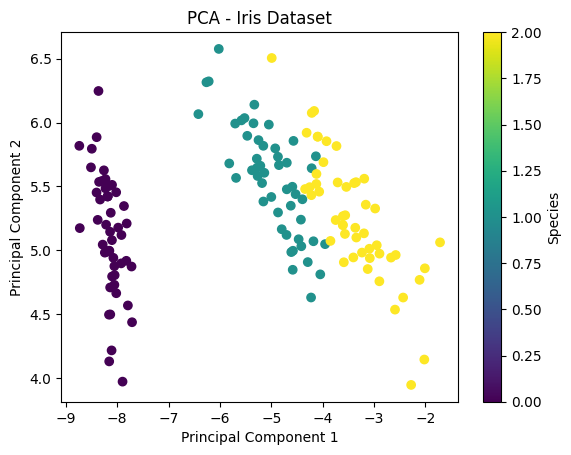

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Map categorical labels to numerical values
label_mapping = {label: idx for idx, label in enumerate(iris.get_classes())}
numerical_labels = np.array([label_mapping[label] for label in iris.y])

# Scatter plot of the reduced dataset
plt.scatter(iris_reduced.X[:, 0], iris_reduced.X[:, 1], c=numerical_labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - Iris Dataset')
plt.colorbar(label='Species')
plt.show()